# K-means 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 k-means
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

  Using cached https://files.pythonhosted.org/packages/11/0f/e2279fee7f9834c63b24fe64515412fd21dd81e82adcf6c79dcc93bb8e6a/scikit_learn-0.20.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/6c/ccf7403d14f0ab0f20ce611696921f204f4ffce99a4fd383c892a6a7e9eb/scipy-1.2.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/site-packages (3.0.2)


載入套件

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [3]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

設定 模型 估計參數

In [4]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

資料建模 並 視覺化 結果

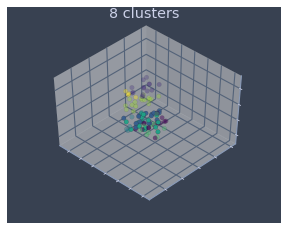

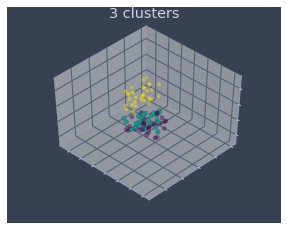

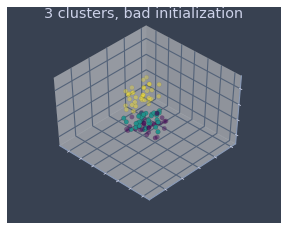

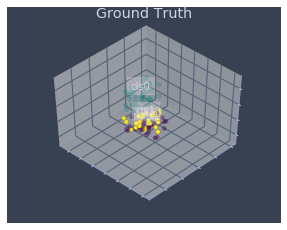

In [5]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

In [7]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
a.T

array([[ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

In [9]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
index = np.array([0,2,1,0])
np.choose(index,a.T)

array([ 1,  6,  8, 10])